In [1]:
import numpy as np
import math
import nltk
import matplotlib.pyplot as plt

from collections import Counter

### 3. Compute nDCG

In [2]:
file_inp = open("IR-assignment-2-data.txt",'r')
index = 0
relevancescore = {}

for i in file_inp.readlines():
    # print(i)
    tokens = i.split()
    if tokens[1]=='qid:4':
        relevancescore[index] = tokens[0]
        index+=1
print(index)

103


In [12]:
def DCG(relevancescore,k):
    it_len = k
    if k==0: it_len = len(relevancescore)
    score = 0
    for i in range(1,it_len+1):
        # score += (float(relevancescore[i-1])/math.log(i+1,2))
        score += ((2**float(relevancescore[i-1])-1)/math.log(i+1,2))
    return score

In [13]:
relv_list = list(relevancescore.values())

count = Counter(relv_list)
# relv_uniq = list(dict(sorted(count.items())).values())
relv_uniq = sorted(count.items())
print(relv_uniq)

relevancescore_sorted = dict(sorted(relevancescore.items(), key=lambda  kv:kv[1],reverse=True))
relv_list_sorted = list(relevancescore_sorted.values())

# NDCG for whole dataset
dcg = DCG(relv_list,0)
idcg = DCG(relv_list_sorted,0)

ndcg = dcg/idcg
print("Whole dataset")
print("DCG =",dcg,", IDCG =",idcg,", NDCG =",ndcg)

# NDCG at 50
dcg = DCG(relv_list,50)
idcg = DCG(relv_list_sorted,50)

ndcg = dcg/idcg
print("NDCG at 50")
print("DCG =",dcg,", IDCG =",idcg,", NDCG =",ndcg)

[('0', 59), ('1', 26), ('2', 17), ('3', 1)]
Whole dataset
DCG = 16.768935581665193 , IDCG = 28.98846753873482 , NDCG = 0.5784691984582591
NDCG at 50
DCG = 10.323516383590077 , IDCG = 28.98846753873482 , NDCG = 0.35612494416255847


### 2. Query url pairs

### 4. Precision-Recall curve for query “qid:4”

In [5]:
file_inp = open("IR-assignment-2-data.txt",'r')
qid = []
total = 0
for i in file_inp.readlines():
    tokens = i.split()
    if tokens[1]=='qid:4':
        tfidf_doc = float(tokens[76].split(":")[1])
        temp = 0
        if int(tokens[0])>0:
            temp = 1
            total+=1
        qid.append([temp,tfidf_doc])

print(total)

44


In [6]:
qid=sorted(qid,key=lambda x:x[1],reverse=True)
print(qid)
count = 1

precision = []
recall = []
classified = 0

for m in qid:
    precision.append(classified/count)
    recall.append(classified/total)
    if m[0] == 1:
        classified += 1
    count += 1

[[0, 972.826451], [0, 612.893205], [0, 571.500533], [0, 538.388954], [1, 528.520116], [0, 463.099129], [1, 439.396463], [1, 411.010633], [0, 316.319283], [1, 311.705149], [0, 305.102064], [1, 296.023694], [1, 292.184568], [1, 270.13233], [1, 237.21632], [1, 237.21632], [0, 226.444023], [1, 217.848266], [0, 212.401296], [1, 202.442155], [0, 201.720933], [1, 200.840161], [0, 200.840161], [1, 198.480212], [1, 192.953467], [1, 188.936782], [0, 188.129935], [0, 187.934366], [0, 186.375414], [0, 185.617459], [0, 180.720002], [1, 180.24324], [0, 177.168378], [1, 176.875026], [0, 176.000104], [0, 169.844071], [1, 166.683125], [1, 161.455583], [0, 161.455583], [1, 161.15638], [1, 157.05992], [1, 156.301965], [0, 148.415271], [0, 148.415271], [0, 144.564444], [0, 143.769297], [1, 143.445062], [0, 142.9683], [1, 142.589323], [0, 142.589323], [1, 142.038637], [1, 140.479685], [0, 130.655061], [1, 121.96152], [1, 121.814843], [0, 121.007996], [1, 108.548081], [1, 103.400313], [0, 98.418404], [1, 98

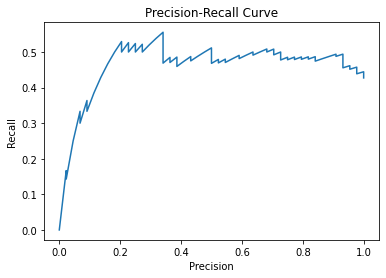

In [7]:
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall Curve')
plt.plot(recall, precision)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5be6439c-c857-493e-9eef-529c4c49e2bf' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>